In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np

In [4]:
adata = sc.read('../../../pipeline_mil/data/multigrate_mil/scpoli_covid_lupus_healthy_balanced/fea73e15db_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 278357 × 30
    obs: 'dataset', 'sample_ID_czi', 'subject_ID_czi', 'cell_type_ontology_term_id', 'cell_type', 'total_counts_lisa', 'batch_czi', 'assay_ontology_term_id', 'assay', 'development_stage_ontology_term_id', 'development_stage', 'disease_ontology_term_id', 'disease', 'ethnicity_ontology_term_id', 'ethnicity', 'organism_ontology_term_id', 'organism', 'sex_ontology_term_id', 'sex', 'tissue_ontology_term_id', 'tissue', 'cell_type_for_integration', 'sample_ID_lataq', 'batch', 'batch_clean', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    uns: 'cell_type_colors', 'dataset_colors', 'neighbors', 'umap'
    obsm: 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'
    obsp: 'connectivities', 'distances'

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


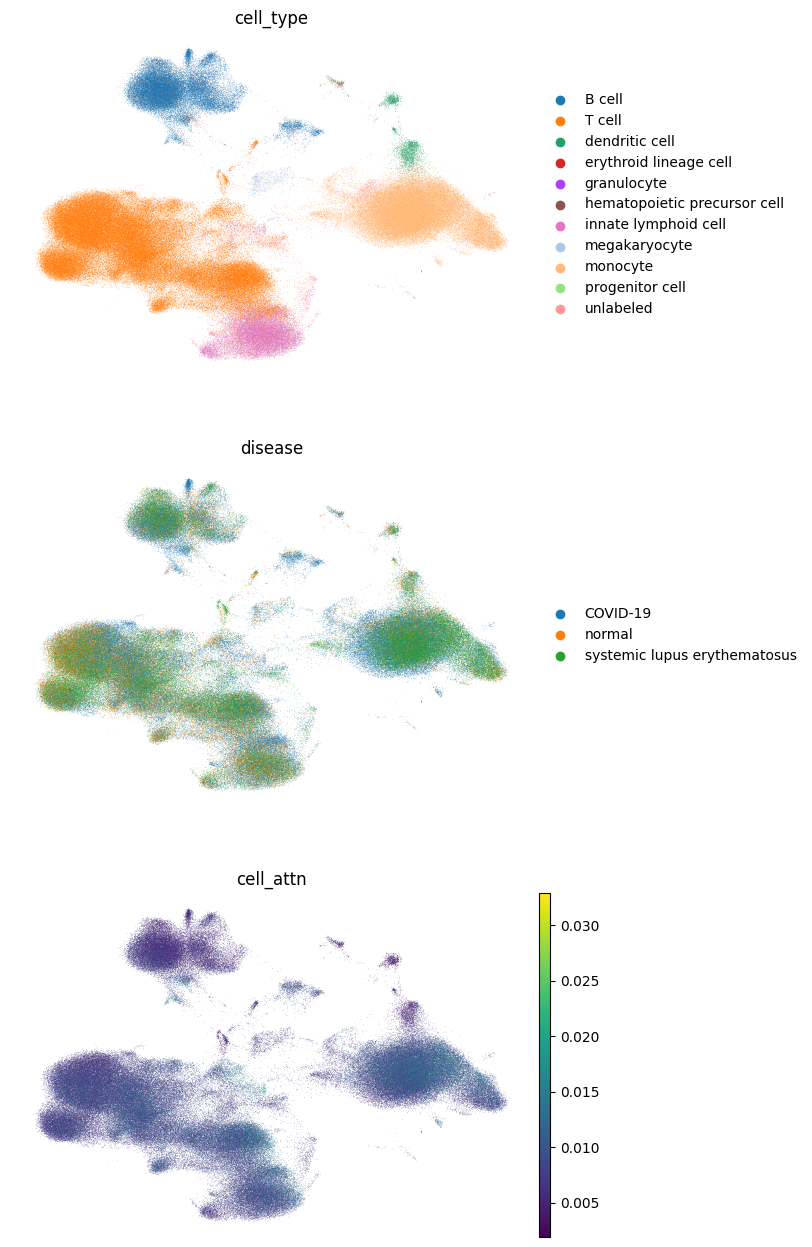

In [4]:
sc.pl.umap(adata, color=['cell_type', 'disease', 'cell_attn'], ncols=1, frameon=False)

COVID-19


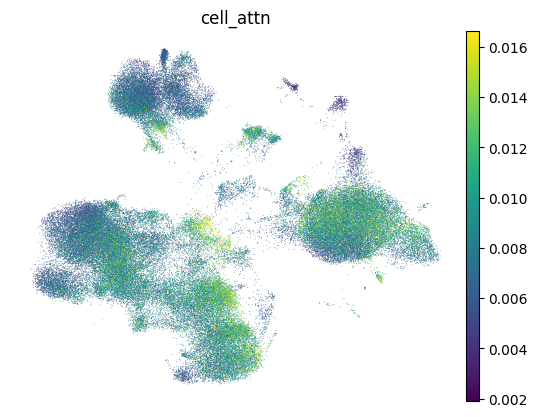

normal


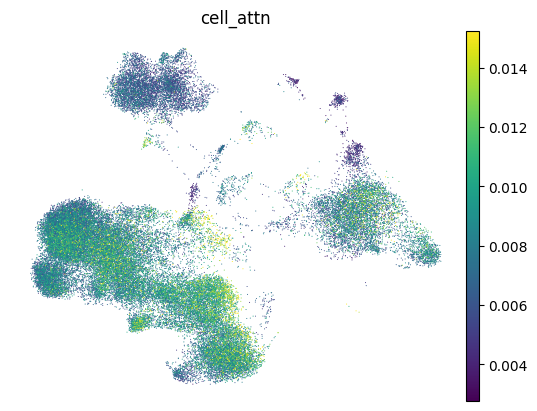

systemic lupus erythematosus


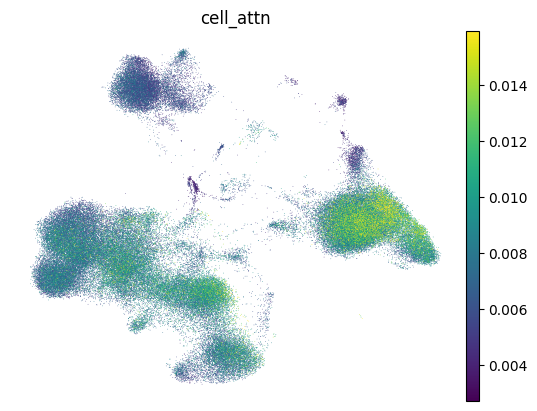

In [8]:
for disease in np.unique(adata.obs['disease']):
    print(disease)
    adata_tmp = adata[adata.obs['disease'] == disease].copy()
    sc.pl.umap(adata_tmp, color=['cell_attn'], vmax='p99', ncols=1, frameon=False)

In [16]:
cd4_t_cell_signature_ensembl_ids = [
    "ENSG00000186868",  # CD4
    "ENSG00000168685",  # IL7R
    "ENSG00000167286",  # CD3D
    "ENSG00000178562",  # CD28
    "ENSG00000198840",  # LCK
    "ENSG00000168606",  # ZAP70
    "ENSG00000134460",  # IL2RA
    "ENSG00000171094",  # CCR7
    "ENSG00000179262",  # FOXP3
    "ENSG00000136634",  # IL10
    "ENSG00000165029",  # TBX21
    "ENSG00000132155",  # GATA3
    "ENSG00000173893",  # RORC
    "ENSG00000113916"   # BCL6
]

In [17]:
type1_interferon_stimulated_genes_ensembl_ids = [
    "ENSG00000142611",  # IFIT1
    "ENSG00000159246",  # IFIT2
    "ENSG00000142610",  # IFIT3
    "ENSG00000139374",  # MX1
    "ENSG00000255955",  # MX2
    "ENSG00000183087",  # OAS1
    "ENSG00000183086",  # OAS2
    "ENSG00000169375",  # OAS3
    "ENSG00000185175",  # ISG15
    "ENSG00000160181",  # RSAD2
    "ENSG00000115414",  # STAT1
    "ENSG00000185594",  # IRF7
    "ENSG00000170246",  # IRF9
    "ENSG00000248548",  # IFI27
    "ENSG00000206172"   # IFI44
]

In [11]:
adata_raw = sc.read('/lustre/groups/ml01/workspace/carlo.dedonno/lataq_reproduce/data/pbmc_raw.h5ad')
adata_raw

AnnData object with n_obs × n_vars = 7800950 × 10000
    obs: 'dataset', 'sample_ID_czi', 'subject_ID_czi', 'cell_type_ontology_term_id', 'cell_type', 'total_counts_lisa', 'batch_czi', 'assay_ontology_term_id', 'assay', 'development_stage_ontology_term_id', 'development_stage', 'disease_ontology_term_id', 'disease', 'ethnicity_ontology_term_id', 'ethnicity', 'organism_ontology_term_id', 'organism', 'sex_ontology_term_id', 'sex', 'tissue_ontology_term_id', 'tissue', 'cell_type_for_integration', 'sample_ID_lataq', 'batch'
    var: 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0'

In [12]:
common_obs = list(set(adata.obs_names).intersection(set(adata_raw.obs_names)))
len(common_obs)

261174

In [13]:
adata_raw = adata_raw[common_obs].copy()
adata_raw

AnnData object with n_obs × n_vars = 261174 × 10000
    obs: 'dataset', 'sample_ID_czi', 'subject_ID_czi', 'cell_type_ontology_term_id', 'cell_type', 'total_counts_lisa', 'batch_czi', 'assay_ontology_term_id', 'assay', 'development_stage_ontology_term_id', 'development_stage', 'disease_ontology_term_id', 'disease', 'ethnicity_ontology_term_id', 'ethnicity', 'organism_ontology_term_id', 'organism', 'sex_ontology_term_id', 'sex', 'tissue_ontology_term_id', 'tissue', 'cell_type_for_integration', 'sample_ID_lataq', 'batch'
    var: 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable_nbatches-0'

In [14]:
adata_raw.write('../../../pipeline_mil/data/raw/scpoli_pbmc_raw_subset.h5ad')

In [30]:
sc.pp.normalize_total(adata_raw, target_sum=1e4)
sc.pp.log1p(adata_raw)

In [31]:
len(cd4_t_cell_signature_ensembl_ids)

14

In [32]:
sc.tl.score_genes(adata_raw, gene_list=cd4_t_cell_signature_ensembl_ids, score_name='cd4_signature')

In [33]:
len(type1_interferon_stimulated_genes_ensembl_ids)

15

In [34]:
sc.tl.score_genes(adata_raw, gene_list=type1_interferon_stimulated_genes_ensembl_ids, score_name='type1_IFN_signature')

In [35]:
adata_lupus = adata[adata.obs['disease'] == 'systemic lupus erythematosus'].copy()
adata_lupus

AnnData object with n_obs × n_vars = 118301 × 30
    obs: 'dataset', 'sample_ID_czi', 'subject_ID_czi', 'cell_type_ontology_term_id', 'cell_type', 'total_counts_lisa', 'batch_czi', 'assay_ontology_term_id', 'assay', 'development_stage_ontology_term_id', 'development_stage', 'disease_ontology_term_id', 'disease', 'ethnicity_ontology_term_id', 'ethnicity', 'organism_ontology_term_id', 'organism', 'sex_ontology_term_id', 'sex', 'tissue_ontology_term_id', 'tissue', 'cell_type_for_integration', 'sample_ID_lataq', 'batch', 'batch_clean', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    uns: 'cell_type_colors', 'dataset_colors', 'neighbors', 'umap'
    obsm: 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'
    obsp: 'connectivities', 'distances'

In [36]:
adata_lupus.obs['cd4_signature'] = adata_raw[adata_raw.obs['disease'] == 'systemic lupus erythematosus'].obs['cd4_signature']

In [37]:
adata_lupus.obs['type1_IFN_signature'] = adata_raw[adata_raw.obs['disease'] == 'systemic lupus erythematosus'].obs['type1_IFN_signature']

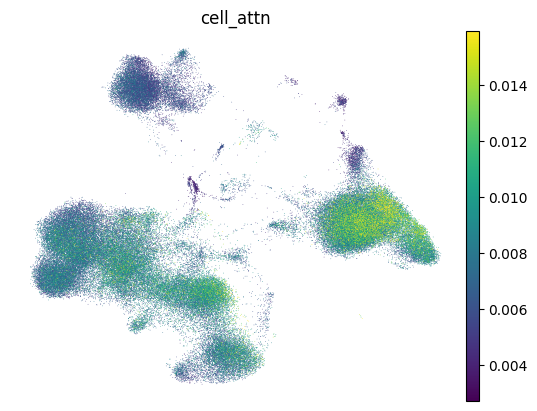

In [38]:
sc.pl.umap(adata_lupus, color=['cell_attn'], vmax='p99', ncols=1, frameon=False)

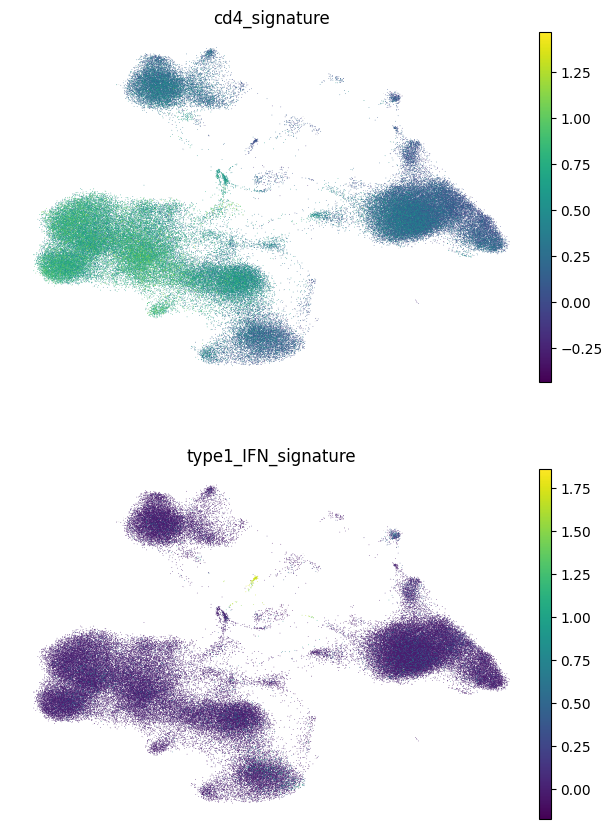

In [39]:
sc.pl.umap(adata_lupus, color=['cd4_signature', 'type1_IFN_signature'], ncols=1, frameon=False)

In [ ]:
IFI27, IFI44, IFI44L and RSAD2

In [ ]:
type1_interferon_stimulated_genes_ensembl_ids = [

    "ENSG00000160181",  # RSAD2
    "ENSG00000248548",  # IFI27
    "ENSG00000206172"   # IFI44
]